<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Customer_Churn_Prediction_Using_Ensemble_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Prediction for consulting purpose**

In [3]:
#load the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load data
from google.colab import files
uploaded = files.upload()



In [5]:
#load dataset
df = pd.read_csv('Telco_customer_churn.csv')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
#Data Preprocessing
df.dtypes

,0
CustomerID,object
Count,int64
Country,object
State,object
City,object
Zip Code,int64
Lat Long,object
Latitude,float64
Longitude,float64
Gender,object


In [6]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [6]:
#Data preprocessing
df.drop('CustomerID',axis=1,inplace=True)
df['Total Charges'] = pd.to_numeric(df['Total Charges'],errors='coerce')
df.dropna(inplace=True)
df=pd.get_dummies(df,drop_first=True)
df.head()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,...,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,1,90003,33.964131,-118.272783,2,53.85,108.15,1,86,3239,...,False,False,False,False,False,False,False,False,False,False
1,1,90005,34.059281,-118.307420,2,70.70,151.65,1,67,2701,...,False,False,False,True,False,False,False,False,False,False
2,1,90006,34.048013,-118.293953,8,99.65,820.50,1,86,5372,...,False,False,False,True,False,False,False,False,False,False
3,1,90010,34.062125,-118.315709,28,104.80,3046.05,1,84,5003,...,False,False,False,True,False,False,False,False,False,False
4,1,90015,34.039224,-118.266293,49,103.70,5036.30,1,89,5340,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#Define features and target on churn
X=df.drop('Churn Score',axis=1)
y=df['Churn Score']


In [8]:
#split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
#

(1495, 2076) (374, 2076)
(1495,) (374,)


In [25]:
#random forest model
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))


0.026737967914438502


In [26]:
#adaBoost model
ada = AdaBoostClassifier(n_estimators=100,random_state=42)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))
#

0.034759358288770054


In [27]:
#print feature ranking
feature_importance = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_importance)
#

Total Charges                      0.036366
Monthly Charges                    0.035779
CLTV                               0.035638
Zip Code                           0.033826
Longitude                          0.033196
                                     ...   
Lat Long_37.872902, -122.303708    0.000000
City_Pine Grove                    0.000000
City_Platina                       0.000000
Lat Long_37.815459, -121.977203    0.000000
Count                              0.000000
Length: 2076, dtype: float64


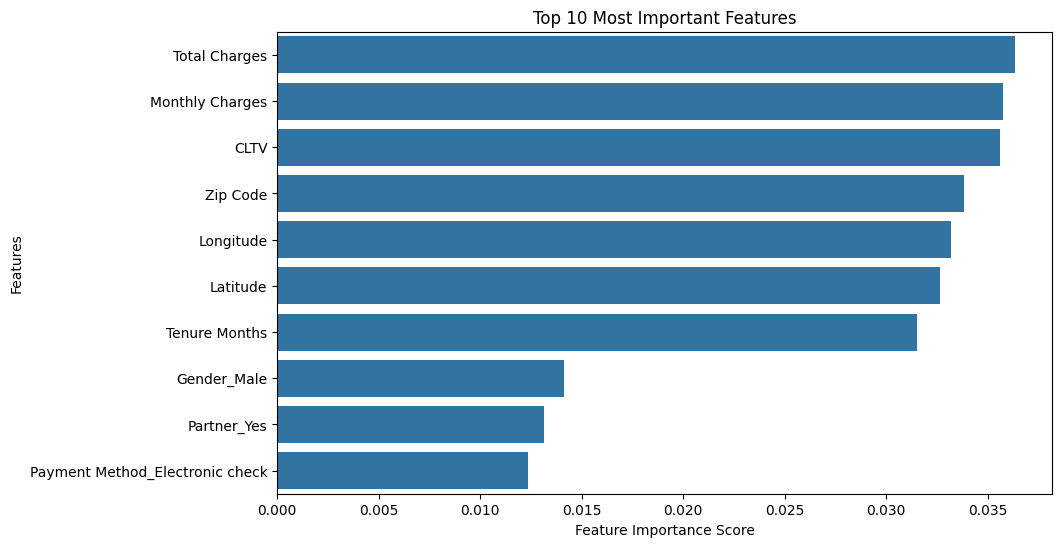

In [30]:
#plot the feature of important only limited
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.head(10),y=feature_importance.head(10).index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features')
plt.show()
#


In [37]:
#apply gradiantboostingclassifer
gb = GradientBoostingClassifier(n_estimators=100,random_state=42)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print(accuracy_score(y_test,y_pred))

# print(classification_report(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))

0.029411764705882353


In [10]:
#Bagging and Booting
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


#use on above training and testing dataset
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

#print the prediction
print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))

0.01871657754010695


In [12]:
#use the Voting Classifier
from sklearn.svm import SVC

#use on above training and testing dataset
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

#print the prediction
print(accuracy_score(y_test,y_pred))


0.026737967914438502


# **Ensemble Techniques in One Shot**

**Step 1: Import Libraries and Load Data**

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [21]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churns.csv to Telco-Customer-Churns.csv


In [24]:
# Load the dataset
data = pd.read_csv('Telco-Customer-Churns.csv')

# Display the first few rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Step 2: Data Preprocessing**

Since churn datasets often have categorical columns, encode these as numbers.

In [25]:
# Convert categorical columns to numerical values
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

# Define features (X) and target variable (y)
X = data.drop('Churn', axis=1)  # Adjust if 'Churn' is named differently
y = data['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 3: Ensemble Models**

1. Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7970191625266146


**2. Bagging Classifier**

In [29]:
# Bagging Classifier with updated 'estimator' parameter
bagging = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))



Bagging Classifier Accuracy: 0.7352732434350603


**3. AdaBoost**

In [30]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Accuracy: 0.8062455642299503


**4. Gradient Boosting**

In [31]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.808374733853797


**5. Voting Classifier**

Combine all classifiers in a voting ensemble.

In [32]:
voting = VotingClassifier(estimators=[
    ('rf', rf), ('bagging', bagging), ('ada', ada), ('gb', gb)], voting='hard')
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))


Voting Classifier Accuracy: 0.7927608232789212


**Visualization**

**Step 1: Churn Distribution Plot**

Churn- Manthan

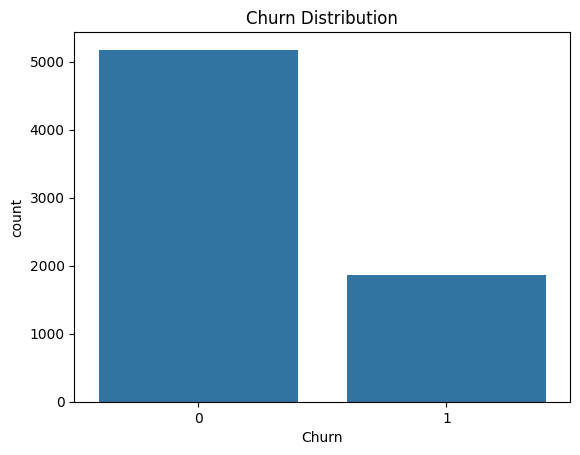

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the churn distribution
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()


**Step 2: Pair Plot**

A pair plot provides a grid of scatter plots for each pair of numerical features, colored by the churn outcome.

In [ ]:
# Pair plot to visualize relationships between features and Churn
sns.pairplot(data, hue='Churn', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Features by Churn", y=1.02)
plt.show()


**Step 3: Correlation Heatmap**

The heatmap helps identify correlations between features and with the target variable.

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Step 4: Box Plot of Features by Churn**

Box plots show the distribution of features with respect to churn, which is useful to detect if a particular feature has different distributions for churned vs. non-churned customers.

In [ ]:
# Select numerical features only
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Box plot of numerical features by Churn
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Churn')
    plt.tight_layout()
plt.show()
